In [3]:
###init###
import pandas as pd
import numpy as np
from scipy.spatial import distance
from timeit import default_timer as timer

df = pd.read_csv('spambase.csv')
all_dat = np.array(df.values)
all_dat_met = np.delete(all_dat, -1, 1)
data_dist = distance.cdist(all_dat_met, all_dat_met, 'euclidean')
spam = all_dat[:, -1]
df_norm=(df-df.min())/(df.max()-df.min())
all_dat_norm = np.array(df_norm.values)
all_dat_met_norm = np.delete(all_dat_norm, -1, 1)
data_dist_norm = distance.cdist(all_dat_met_norm, all_dat_met_norm, 'euclidean')

In [16]:
###1st###
def kNN(test, data, spam, k=10):
    dist_t = distance.cdist(test, data, 'euclidean')
    sort_t = np.argpartition(dist_t, k)[:,:k]
    rs = np.sum(np.take(spam, sort_t), axis=1) - k/2
    return np.where(rs > 0, True, False)
    
# test_k = all_dat_met[0::3]
# data_k = np.concatenate((all_dat_met[1::3],all_dat_met[2::3]), axis=0)
# spam_k = np.concatenate((all_dat[1::3, -1], all_dat[2::3, -1]))
# kNN(test_k, data_k, spam_k, 10)

###2nd###
def kNN_loo(data_dist, k):
    dist_t = data_dist - np.eye(len(data_dist),dtype=int)
    sort_t = np.argpartition(dist_t, [0,k + 1])[:,1:k+1]
    rs = np.sum(np.take(spam, sort_t), axis=1) - k/2
    return len(spam) - np.sum(np.where(rs > 0, True, False) == spam)

for k in range(1, 11):
    ind = kNN_loo(data_dist, k)
    print(str(k) + ": " + str(ind))

1: 780
2: 877
3: 853
4: 887
5: 855
6: 922
7: 901
8: 925
9: 932
10: 930


In [3]:
###3rd###
def RadiusNeighbours(test, data, spam, radius):
    dist_t = distance.cdist(test, data, 'euclidean')
    dist_rad = np.where(dist_t<radius, True, False)
    k = np.sum(dist_rad, axis=1)
    s = np.sum(np.multiply(dist_rad, spam), axis=1)
    rs = s - k/2
    return np.where(rs > 0, True, False)

# test_r = all_dat_met[0::3]
# data_r = np.concatenate((all_dat_met[1::3],all_dat_met[2::3]), axis=0)
# spam_r = np.concatenate((all_dat[1::3, -1], all_dat[2::3, -1]))
# np.sum(RadiusNeighbours(test_r, data_r, spam_r, 100)


def Radius_loo(data_dist, radius):
    dist_rad = np.where(data_dist<radius, True, False)
    k = np.sum(dist_rad, axis=1)-1
    s = np.sum(np.multiply(dist_rad, spam), axis=1)-spam
    res = s - k/2
    return len(spam) - np.sum(np.where(res>0, True, False) == spam)

In [17]:
###4th###
def tern_search(data_dist, l, r, e):
    def tern(l, r, e):
        if r-l<=e:
            return l
        m1 = l + (r-l)/30
        m2 = r - (r-l)/30
        f1 = Radius_loo(data_dist, m1)
        f2 = Radius_loo(data_dist, m2)
        print("m1=" + str(m1) + " f(m1)=" + str(f1) + " m2=" + str(m2) + " f(m2)=" + str(f2) + "     \r", end="")
        if f1 > f2:
            return tern(m1, r, e)
        elif f1 < f2:
            return tern(l, m2, e)
        else:
            return tern(m1, m2, e)


    res = tern(l, r, e)
    print(str(res) + ": " + str(Radius_loo(data_dist, res)) + " "*45)
tern_search(data_dist, 0.001, 200, 0.001)

KeyboardInterrupt: 

In [5]:
###5th###
for k in range(1, 11):
    ind = kNN_loo(data_dist_norm, k)
    print(str(k) + ": " + str(ind))

1: 404
2: 465
3: 436
4: 467
5: 438
6: 473
7: 457
8: 471
9: 469
10: 484


In [6]:
tern_search(data_dist_norm, 0.001, 5, 0.001)

0.2046927220667909: 746                                                  


In [7]:
x = np.arange(0.1,200,1.)
y = [Radius_loo(data_dist, t) for t in x]

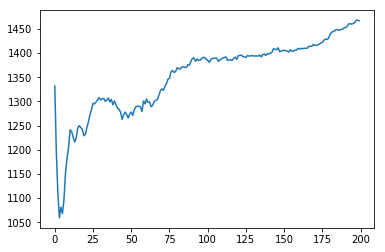

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [9]:
x1 = np.arange(0.001,20.,0.1)
y1 = [Radius_loo(data_dist_norm, t) for t in x1]

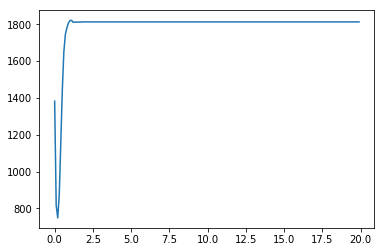

In [10]:
plt.plot(x1, y1)
plt.show()

In [14]:
x2 = np.arange(0.001,1.,0.01)
y2 = [Radius_loo(data_dist_norm, t) for t in x2]

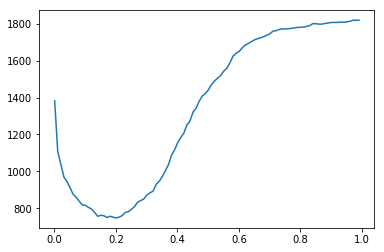

In [15]:
plt.plot(x2, y2)
plt.show()

In [8]:
c = np.array([[1,2], [2,3]])
def fun(a):
    print(a[0]+a[1])
fun(c)

[3 5]


In [26]:

test = np.zeros((40, 3000), dtype=list)
for i in range(40):
    for j in range(3000):
        test[i,j] = [0.5 + 0.01*i, 10 + 0.01*j]
test = np.array(test)

In [27]:
def AffProp(kf):
    it = 10
    alph = kf
    global s,r,a
    for i in range(it):
        summ = a + s
        max_arg = np.argpartition(summ, -2, axis=1)[:,-2:]
        max_sum = np.max(summ, axis=1, keepdims=True)
        r = alph*(s - max_sum) + (1-alph)*r
        for i in range(ln):
            r[i,max_arg[i,1]] += alph*summ[i,max_arg[i,1]] - alph*summ[i,max_arg[i,0]]
        maxx = np.where(r>0, r, 0)
        for_min = np.sum(maxx*zero_eye, axis=0, keepdims=True) - maxx + r[tru_eye]
        a = alph*(np.where(for_min < 0, for_min, 0)*zero_eye + (np.sum(maxx*zero_eye, axis=0))*one_eye) + (1-alph)*a
    return np.argmax(a+r, axis=1)

In [28]:
def fun(kf):
    global s
    s = 6 - s1 - kf[1]*one_eye
    res = AffProp(kf[0])
    if len(set(res)) <= 3:
        print("eye: " + str(eye) + ", sgl: " + str(sgl))


In [29]:
fun(test)

ValueError: operands could not be broadcast together with shapes (3000,) (4601,4601) 

In [24]:
dff = pd.read_csv('blobs.csv')
dataf = np.array(df.values)
ln = len(dataf)
s1 = distance.cdist(dataf, dataf, 'euclidean')
r = np.zeros((ln,ln),dtype=int)
a = np.zeros((ln,ln),dtype=int)
tru_eye = np.eye(ln, dtype=bool)
eye_mask = np.where(np.eye(ln, dtype=bool), False, True)
zero_eye = np.where(tru_eye, 0, 1)
one_eye = np.where(tru_eye, 1, 0)

In [30]:
for eye in np.arange(10,40,0.01):
        s = 6 - s1 - eye*one_eye
        res = AffProp(1)
        if len(set(res)) <= 3:
            print("eye: " + str(eye) + ", sgl: " + str(sgl))

KeyboardInterrupt: 

In [31]:
for sgl in np.arange(0.9,0.5,-0.01):
    print(sgl)
    for eye in np.arange(10,40,0.01):
        s = 6 - s1 - eye*one_eye
        res = AffProp(sgl)
        if len(set(res)) <= 3:
            print("eye: " + str(eye) + ", sgl: " + str(sgl))

0.9


KeyboardInterrupt: 

In [ ]:
# res = AffProp(1000, 0.5)#0100000001000005)
# print(r)
# res = AffProp(100, 0.5)
# s = 5 - s - 5*one_eye
# s = 5 - s - 10*one_eye
# s = 5 - s - 11*one_eye
# s = 6 - s - 11*one_eye
# s = 6 - s - 20*one_eye ##4
# s = 6 - s - 28.52*one_eye ##3
# s = 6 - s1 - 34*one_eye ##4 ## 1000it

In [ ]:
###2###
def DBSCAN(epsilon, m):
    dist = distance.cdist(data, data, 'euclidean')
    res_arg = np.sum(np.where(dist < epsilon, True, False), axis=1) >= m
    res_centres = data[res_arg]
    dist_mid = distance.cdist(res_centres, res_centres, 'euclidean')
    dist_mid = np.where(dist_mid < epsilon, 1, 0)
    mark = np.zeros(len(dist_mid), dtype=int)
    mark[0] = 1
    global mk
    mk = 1
    def df(ind):
        neib = np.argwhere(dist_mid[ind]>0)
        for nb in neib:
            if mark[nb[0]]==0:
                mark[nb[0]] = mk
                df(nb[0])
    def dfs():
        for i in range(len(dist_mid)):
            df(i)
            global mk
            mk+=1
    dfs()
    dif = len(set(mark))
    st = np.array(list(set(mark)))
    mid_set = {}
    for i in range(dif):
        mid_set[i] = []
    for i in range(dif):
        mid_set[i].extend((res_centres[np.where(mark==st[i], True, False)]))
    data_aval = data[np.where(res_arg, False, True)]
    for i in range(dif):
        cur_dist = distance.cdist(mid_set[i], data_aval, 'euclidean')
        cur_dist = np.min(cur_dist, axis=0)
        neb = np.where(cur_dist < epsilon, True, False)
        temp = data_aval[neb]
        mid_set[i] = np.append(mid_set[i], temp)
        mid_set[i] = mid_set[i].reshape(len(mid_set[i])//2,2)
        data_aval = data_aval[np.where(neb, False, True)]
        
    def get_cmap(n, name='hsv'):
        return plt.cm.get_cmap(name, n)
    cmap = get_cmap(dif)
    for i in range(dif):
        plt.scatter(mid_set[i][:,0], mid_set[i][:,1], c=cmap(i))
    plt.scatter(data_aval[:,0], data_aval[:,1], c='k')
    plt.show()
        
    
    dist_c = distance.cdist(res_centres, data, 'euclidean')
    dist_cls = np.where(np.sum(np.where(dist_c < epsilon, True, False), axis=0)>0, True, False)
    res_args = np.argmin(dist_c.T[dist_cls].T, axis=0)
    
DBSCAN(0.4, 30)